In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
df1=pd.read_csv('StudentsPerformance_modified.csv')

In [3]:
df1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


In [4]:
df1.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                      object
reading score                  float64
writing score                  float64
dtype: object

In [5]:
df1.shape

(1000, 8)

In [10]:
df1.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [15]:
df2.shape

(978, 8)

In [16]:
df2.replace("?",np.nan,inplace=True)

C:\Users\ADMIN\anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [17]:
df2=df2.dropna()

In [18]:
df2.shape

(943, 8)

In [19]:
df2=df2.astype({"math score":int,"reading score":int,"writing score":int})
df2.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int32
reading score                   int32
writing score                   int32
dtype: object

<AxesSubplot:xlabel='math score'>

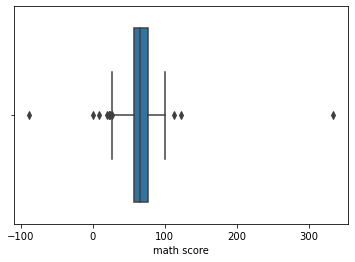

In [22]:
# Box plots before outlier removal
sns.boxplot(x=df2["math score"])

<AxesSubplot:xlabel='reading score'>

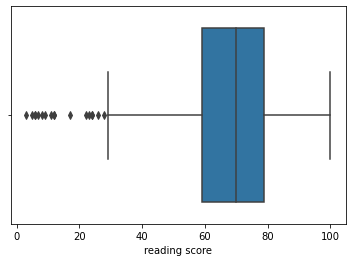

In [23]:
sns.boxplot(x=df2["reading score"])

<AxesSubplot:xlabel='writing score'>

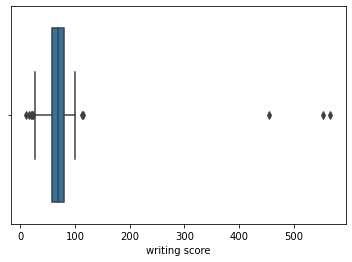

In [24]:
sns.boxplot(x=df2["writing score"])

[59, 145, 338, 420, 431, 456, 466, 474, 787, 842, 980, 24, 25, 26, 27, 29, 30, 31, 33, 35, 36, 37, 59, 76, 211, 327, 596, 980, 59, 76, 327, 459, 465, 542, 591, 596, 651, 980]
After removing outliers


<AxesSubplot:xlabel='math score'>

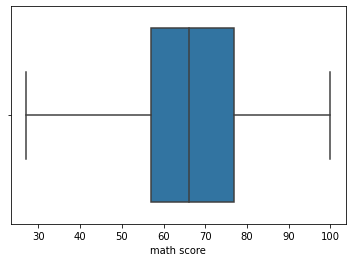

In [34]:
def outliers(df,feature): #Takes in df and column.Returns list of indexes of ouliers.
    q1=df[feature].quantile(0.25)
    q3=df[feature].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    ls=df.index[(df[feature]<lower_bound) | (df[feature]>upper_bound)]
    return ls
def remove(df,ls):
    ls=sorted(set(ls))
    df=df.drop(ls)
    return df
# Creating the list of outliers.
index_list=[]
for feature in['math score','reading score','writing score']:
    index_list.extend(outliers(df2,feature))
print(index_list)
#Remove ouliers.
df3=remove(df2,index_list)
print("After removing outliers")
sns.boxplot(x=df3["math score"])
    

<AxesSubplot:xlabel='reading score'>

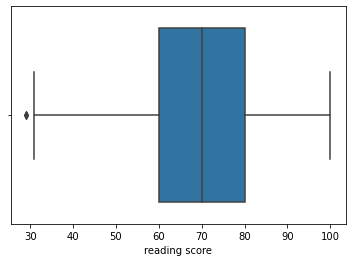

In [35]:
sns.boxplot(x=df3["reading score"])

<AxesSubplot:xlabel='writing score'>

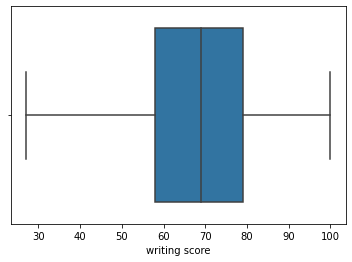

In [36]:
sns.boxplot(x=df3["writing score"])

In [37]:
#Mean normalization.
df3.describe()

,math score,reading score,writing score
count,912.000000,912.000000,912.000000
mean,66.527412,69.559211,68.532895
std,14.529327,14.135335,14.579846
min,27.000000,29.000000,27.000000
25%,57.000000,60.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


In [38]:
df4=(df3-df3.mean())/df3.std()
df4.describe()

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_13892/3428673909.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df4=(df3-df3.mean())/df3.std()


,math score,reading score,writing score
count,9.120000e+02,9.120000e+02,9.120000e+02
mean,7.218884e-17,-3.571704e-16,-3.213803e-16
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.720526e+00,-2.869349e+00,-2.848651e+00
25%,-6.557367e-01,-6.762635e-01,-7.224284e-01
50%,-3.629984e-02,3.118352e-02,3.203774e-02
75%,7.207896e-01,7.386305e-01,7.179160e-01
max,2.303795e+00,2.153524e+00,2.158260e+00
